# Preliminaries

In [1]:
import os
#os.environ["PATH"]="/opt/conda/envs/python2/bin:"+os.environ["PATH"]

Check the version of Python being used. 

In [2]:
!python --version

Python 2.7.12


Specify the parent directory where you want to store the Cactus directory. Once Cactus is built, its contents cannot be easily moved without breaking things. If the Cactus directory is later moved, one has to repeat the following steps to rebuild it from its new location.

In [3]:
etk_dir = '/home/ejwest/ETK'

Change the working directory to the parent directory specified above.

In [4]:
%cd $etk_dir

/home/ejwest/ETK


![cactus](http://cactuscode.org/global/images/cactuslogo.png)

# Compiling Cactus!

Step 1 is to download the code. Cactus uses a script named "GetComponents" to find and prepare all the source code modules that it needs for a given installation. The GetComponents script can be downloaded with a simple invocation of curl. To download GetComponents, uncomment and execute the following lines.

In [8]:
#%cd $etk_dir
#!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2018_02/GetComponents

Step 2 is to download your thornlist. In this tutorial, we are going to use the Einstein Toolkit, a collection of thorns designed to solve the Einstein equations numerically. To download the Einstein Toolkit thornlist, uncomment and execute the following lines.

In [9]:
#%cd $etk_dir
#!curl -kLO https://bitbucket.org/einsteintoolkit/manifest/raw/ET_2018_02/einsteintoolkit.th

You can view a file in the notebook by using the "magic" command "%pycat filename". However, %pycat tries to highlight syntax as if the file is written in python. In those cases you can simply use "%cat filename." Unfortunately, unlike %pycat, %cat leaves the contents of the file on the screen.

To view the downloaded thornlist using %pycat, uncomment and execute the following lines. Note that at the top of the file is a line that reads "DEFINE_ROOT = Cactus". This means that Cactus, and all its thorns, will be checked out under that directory.

In [10]:
%cd $etk_dir
%pycat einsteintoolkit.th

/home/ejwest/ETK


Step 3 is to checkout the components listed in the thornlist. You do this with the GetComponents command.
However before you can execute it, you need to turn on its execute bit. That is what the "chmod" line below does. To run GetComponents, uncomment and execute the following lines.

In [11]:
#%cd $etk_dir
#!chmod a+x GetComponents
#!echo no|./GetComponents --update einsteintoolkit.th

In what follows, it will be useful to have a shortcut variable for the Cactus directory. All simulations are launched from this directory. To create a shortcut variable, edit and execute the following line.

In [12]:
cactus_dir = '/home/ejwest/ETK/Cactus'

Move to the Cactus directory.

In [13]:
%cd $cactus_dir

/home/ejwest/ETK/Cactus


<img src="http://simfactory.org/global/images/factory.png" width="200px">

# Simfactory
Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. To configure Simfactory, edit and execute the following lines. Replace the email address in the command below with yours. The email address isn't sent anywhere, all it's used for is allowing Cactus to send job change state notifications to you.

In [14]:
#%cd $cactus_dir
#!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu 

The above setup command has created a user configuration file. This file contains contains defaults that are used any time you run simfactory. In addition, a machine-specific configuration file has been created in teh machine database (mdb). This file is located in "simfactory/mdb/machines". Your machine name can be identified using the following.

In [15]:
!hostname

lagrange


Next create a shortcut variable for the mdb file. Change the name of the .ini file in the path below to your machine name, returned by the hostname command above.

In [16]:
mdb_file = './simfactory/mdb/machines/lagrange.ini'
!echo $mdb_file

./simfactory/mdb/machines/lagrange.ini


One of the things you may want to change in your mdb file is the directory where simulation output data are dumped. By default, a folder named "simulations" is created in your home directory for this purpose. If you want output data to be printed elsewhere, change the "basedir" entry in the mdb file. You may also want to change "ppn", "max-num-threads", and "num-threads" to the number of physical cores on your machine. If your machine supports hyperthreading, add a line "num-smt = 2".

To view the mdb file using %pycat, uncomment and execute the following lines.

In [17]:
#%cd $cactus_dir
#%pycat $mdb_file

To load the mdb file for your machine, uncomment and execute the following line.

In [18]:
#%load $mdb_file

IF you loaded your mdb file in the previous step, and IF you wish to modify it, then cut and paste the file contents above into the following cell, uncommenting the magic command "%%writefile $mdb_file" at the top. This allows you to edit the mdb file directly from the notebook interface. When your edits are finished, execute the cell. WARNING: this will overwrite your machine's mdb file. This step is optional. If you don't want to mess around with your mdb file at this stage, move to the next step. (NOTE: If you mess things up at any stage, you can always go back to the top of this section and restart the setup process. You do NOT need to recompile Cactus, in the previous section.)

In [19]:
#%%writefile $mdb_file

At long last, you are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand. The file containing this information is called the OptionList. You can specify an OptionList by hand using the --optionlist=filename.cfg option in the command below. OptionList examples are found in Cactus/simfactory/mdb/optionlists. A good template to start with on a workstation is generic.cfg. Here we will assume that Cactus is smart enough to figure things out on its own, without any OptionList intervention.

To start from a clean slate and remove any previous configurations, uncomment and execute the following lines.

In [21]:
#%cd $cactus_dir
#!rm -rf configs

Finally, below is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the -j option does. If all goes well, this step takes a while. Go get a coffee and come back in 30 minutes or so! To proceed to build Cactus, uncomment and execute the following lines.

In [22]:
#%cd $cactus_dir
#!time ./simfactory/bin/sim build -j2 --thornlist=thornlists/einsteintoolkit.th 

The build command creates a configuration called "sim". It is found in the "configs/sim" directory. Let's move to this directory and list its contents.

In [23]:
%cd $cactus_dir/configs/sim
%ls

/home/ejwest/ETK/Cactus/configs/sim
BUILD-ID    SubmitScript  config-data/    lib/
CONFIG-ID   ThornList     config-info     piraha/
OptionList  bindings/     configjar.git/  properties.ini
RunScript   build/        datestamp.o     scratch/


Notice that one of the files in this directory is the ThornList. It contains the list of thorns Cactus will compile. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. 
However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk! To view the current ThornList using %pycat, uncomment and execute the following line.

In [41]:
#%pycat ThornList

The OptionList file contains all the configuration options. To view the current OptionList using %pycat, uncomment and execute the folowing lines. 

In [26]:
#%pycat OptionList

Unlike the ThornList file, changing the OptionList file here will have no effect. If you wish to change your configuration options without starting over from scratch (i.e., without re-building simfactory), you should edit the file "configs/sim/config-data/make.config.defn." To view this file using %pycat, uncomment and execute the following line.

In [24]:
#%pycat config-data/make.config.defn

# Running Cactus!

Finally, let's run a simulation. First move to the Cactus directory.

In [27]:
%cd $cactus_dir

/home/ejwest/ETK/Cactus


Below we are going to run a simulation that solves the Tolman-Oppenheimer-Volkoff (TOV) equations for a static neutron star. Below is the parameter file for this simulation. Executing the following cell will save any changes to the parfile. (If you don't want to edit the parfile, you can either skip to the next step, or comment out the "%%writefile" line below.)

In [28]:
%%writefile par/static_tov_small.par
## mclachlan tov_static
ActiveThorns = "Time MoL"
ActiveThorns = "Coordbase CartGrid3d Boundary StaticConformal"
ActiveThorns = "SymBase ADMBase TmunuBase HydroBase InitBase ADMCoupling ADMMacros"
ActiveThorns = "IOUtil Formaline"
ActiveThorns = "SpaceMask CoordGauge Constants LocalReduce aeilocalinterp LoopControl"
ActiveThorns = "Carpet CarpetLib CarpetReduce CarpetRegrid2 CarpetInterp"
ActiveThorns = "CarpetIOASCII CarpetIOScalar CarpetIOHDF5 CarpetIOBasic"

ActiveThorns = "ML_ADMConstraints NaNChecker"

# grid parameters
CartGrid3D::type         = "coordbase"
CartGrid3D::domain       = "full"
CartGrid3D::avoid_origin = "no"
CoordBase::xmin =   0.0
CoordBase::ymin =   0.0
CoordBase::zmin =   0.0
CoordBase::xmax = 240.0
CoordBase::ymax = 240.0
CoordBase::zmax = 240.0
CoordBase::dx   =   12
CoordBase::dy   =   12
CoordBase::dz   =   12

CoordBase::boundary_size_x_lower        = 3
CoordBase::boundary_size_y_lower        = 3
CoordBase::boundary_size_z_lower        = 3
CoordBase::boundary_size_x_upper        = 3
CoordBase::boundary_size_y_upper        = 3
CoordBase::boundary_size_z_upper        = 3
CoordBase::boundary_shiftout_x_lower    = 1
CoordBase::boundary_shiftout_y_lower    = 1
CoordBase::boundary_shiftout_z_lower    = 1
CoordBase::boundary_shiftout_x_upper    = 0
CoordBase::boundary_shiftout_y_upper    = 0
CoordBase::boundary_shiftout_z_upper    = 0




ActiveThorns = "ReflectionSymmetry"

ReflectionSymmetry::reflection_x = "yes"
ReflectionSymmetry::reflection_y = "yes"
ReflectionSymmetry::reflection_z = "yes"
ReflectionSymmetry::avoid_origin_x = "no"
ReflectionSymmetry::avoid_origin_y = "no"
ReflectionSymmetry::avoid_origin_z = "no"



TmunuBase::stress_energy_storage = yes
TmunuBase::stress_energy_at_RHS  = yes
TmunuBase::timelevels            =  1
TmunuBase::prolongation_type     = none

HydroBase::timelevels            = 3

ADMMacros::spatial_order = 4

ADMBase::metric_type     = "physical"

ML_ADMConstraints::timelevels = 3

SpaceMask::use_mask      = "yes"

Cactus::terminate           = "time"
Cactus::cctk_final_time     = 1000

Carpet::domain_from_coordbase = "yes"
Carpet::enable_all_storage       = no
Carpet::use_buffer_zones         = "yes"

Carpet::poison_new_timelevels    = "yes"
Carpet::check_for_poison         = "no"
Carpet::poison_value             = 113

Carpet::init_3_timelevels        = no
Carpet::init_fill_timelevels     = "yes"

CarpetLib::poison_new_memory = "yes"
CarpetLib::poison_value      = 114

# system specific Carpet paramters
Carpet::max_refinement_levels    = 10
driver::ghost_size               = 3
Carpet::prolongation_order_space = 3
Carpet::prolongation_order_time  = 2

CarpetRegrid2::regrid_every = 0
CarpetRegrid2::num_centres  = 1

CarpetRegrid2::num_levels_1 = 5
CarpetRegrid2::radius_1[1]  =120.0
CarpetRegrid2::radius_1[2]  = 60.0
CarpetRegrid2::radius_1[3]  = 30.0
CarpetRegrid2::radius_1[4]  = 15.0


time::dtfac = 0.25
MoL::ODE_Method             = "rk4"
MoL::MoL_Intermediate_Steps = 4
MoL::MoL_Num_Scratch_Levels = 1

# check all physical variables for NaNs
NaNChecker::check_every = 1
NaNChecker::action_if_found = "just warn" #"terminate", "just warn", "abort"
NaNChecker::check_vars = "ADMBase::metric ADMBase::lapse ADMBase::shift HydroBase::rho HydroBase::eps HydroBase::press HydroBase::vel"

## Lapse Condition:  \partial_t alpha = - alpha K
## Shift Condition:  \partial_t beta^i = 0

# Hydro paramters
ActiveThorns = "EOS_Omni"
ActiveThorns = "GRHydro"

HydroBase::evolution_method      = "GRHydro"

GRHydro::riemann_solver            = "Marquina"
GRHydro::GRHydro_eos_type           = "Polytype"
GRHydro::GRHydro_eos_table          = "2D_Polytrope"
GRHydro::recon_method              = "ppm"
GRHydro::GRHydro_stencil            = 3
GRHydro::bound                     = "none"
GRHydro::rho_abs_min               = 1.e-10
#GRHydro::GRHydro = 18 # Tmunu(10), rho,press,eps,w_lorentz,vel, tau
#GRHydro::GRHydro    = 10    # gij(6), alpha, beta(3)


ActiveThorns = "GenericFD NewRad"
ActiveThorns = "ML_BSSN ML_BSSN_Helper"
ADMBase::evolution_method        = "ML_BSSN"
ADMBase::lapse_evolution_method  = "ML_BSSN"
ADMBase::shift_evolution_method  = "ML_BSSN"
ADMBase::dtlapse_evolution_method= "ML_BSSN"
ADMBase::dtshift_evolution_method= "ML_BSSN"

ML_BSSN::timelevels = 3

ML_BSSN::harmonicN           = 1      # 1+log
ML_BSSN::harmonicF           = 1.0    # 1+log
ML_BSSN::evolveA             = 1
ML_BSSN::evolveB             = 0
ML_BSSN::ShiftGammaCoeff     = 0.0
ML_BSSN::AlphaDriver         = 0.0
ML_BSSN::BetaDriver          = 0.0
ML_BSSN::advectLapse         = 0
ML_BSSN::advectShift         = 0

ML_BSSN::MinimumLapse        = 1.0e-8

ML_BSSN::initial_boundary_condition = "extrapolate-gammas"
ML_BSSN::rhs_boundary_condition     = "NewRad"

ML_BSSN::ML_log_confac_bound = "none"
ML_BSSN::ML_metric_bound     = "none"
ML_BSSN::ML_Gamma_bound      = "none"
ML_BSSN::ML_trace_curv_bound = "none"
ML_BSSN::ML_curv_bound       = "none"
ML_BSSN::ML_lapse_bound      = "none"
ML_BSSN::ML_dtlapse_bound    = "none"
ML_BSSN::ML_shift_bound      = "none"
ML_BSSN::ML_dtshift_bound    = "none"



# init parameters
InitBase::initial_data_setup_method = "init_some_levels"

ActiveThorns = "TOVSolver"

ADMBase::initial_data            = "tov"
ADMBase::initial_lapse           = "tov"
ADMBase::initial_shift           = "tov"
ADMBase::initial_dtlapse         = "zero"
ADMBase::initial_dtshift         = "zero"

TOVSolver::TOV_Rho_Central[0] = 1.28e-3
TOVSolver::TOV_Gamma          = 2.0
TOVSolver::TOV_K              = 100.0


IOBasic::outInfo_every              = 1
IOBasic::outInfo_vars               = "HydroBase::rho ADMBase::lapse"

IO::out_dir      = $parfile

IOScalar::outScalar_every = 32
IOScalar::one_file_per_group = yes
IOScalar::outScalar_vars  = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"

IOASCII::out1D_every     = 256
IOASCII::one_file_per_group = yes
IOASCII::output_symmetry_points = no
IOASCII::out3D_ghosts           = no
IOASCII::out3D_outer_ghosts     = no
IOASCII::out1D_vars      = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"


Overwriting par/static_tov_small.par


Next create a shortcut variable for the directory where simulation output data is dumped. To do this, edit and execute the following line.

In [29]:
sim_dir = '/home/ejwest/ETK/simulations'

To delete any old versions of the simulation and start over again, uncomment and execute the following line.

In [30]:
#!rm -rf $sim_dir/static_tov_small

At long last, we are ready run Cactus. This configuration specifies running on two threads, with 1 thread per process. To execute this command, Cactus uses a RunScript stored in configs/sim/RunScript. You might want to take a look at it. Identifiers sandwiched between @ symbols get replaced by Simfactory prior to execution. To view the RunScript using %pycat, uncomment and execute the following line.

In [31]:
#%pycat $cactus_dir/configs/sim/RunScript

Enough already! Let's run Cactus! We are creating a new simulation called "static_tov_small", using the above parfile, and the specified number of processes. Set procs equal to the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores). The simulation may take several hours to finish, depending on the speed of your machine. To start running, uncomment and execute the following lines.

In [ ]:
%cd $cactus_dir
!./simfactory/bin/sim create-run static_tov_small --parfile=par/static_tov_small.par --procs=4

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/par/static_tov_small.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/static_tov_small"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/par/static_tov_small.par"
Simulation name: static_tov_small
Assigned restart id: 0 
Running simulation static_tov_small
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ hostname
lagrange
+ date
Sat Apr 21 11:33:07 CDT 2018
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_

INFO (Carpet): Multi-Model listing:
   model 0: "world"
INFO (Carpet): Multi-Model process distribution:
   process 0: model 0 "world"
INFO (Carpet): Multi-Model: This is process 0, model 0 "world"
INFO (CarpetLib): Process startup time was 1.88 seconds
Current core file size limit: hard=[unlimited], soft=0 MB
Current memory size limit: hard=[unlimited], soft=[unlimited]
INFO (CycleClock): Measuring CycleClock tick via OpenMP...
INFO (CycleClock): Calibrated CycleClock: 0.358005 ns per clock tick (2.79326 GHz)
INFO (Formaline): Configuration id: config-sim-lagrange-home-ejwest-ETK-Cactus
INFO (Formaline): Build id: build-sim-lagrange-ejwest-2018.04.09-18.40.32-8854
INFO (Formaline): Simulation id: run-static_tov_small-lagrange-ejwest-2018.04.21-16.33.09-17097
INFO (Formaline): Run id: run-static_tov_small-lagrange-ejwest-2018.04.21-16.33.09-17097
INFO (Vectors): Using vector size 2 for architecture SSE2 (64-bit precision)
----------------------------------------------------------------

INFO (Carpet): Grid structure (superregions, grid points):
   [0][0][0]   exterior: [0,0,0] : [25,25,25]   ([26,26,26] + PADDING) 17576
   [1][0][0]   exterior: [3,3,3] : [37,37,37]   ([35,35,35] + PADDING) 42875
   [2][0][0]   exterior: [9,9,9] : [43,43,43]   ([35,35,35] + PADDING) 42875
   [3][0][0]   exterior: [21,21,21] : [54,54,54]   ([34,34,34] + PADDING) 39304
   [4][0][0]   exterior: [45,45,45] : [77,77,77]   ([33,33,33] + PADDING) 35937
INFO (Carpet): Grid structure (superregions, coordinates):
   [0][0][0]   exterior: [-36.000000000000000,-36.000000000000000,-36.000000000000000] : [264.000000000000000,264.000000000000000,264.000000000000000] : [12.000000000000000,12.000000000000000,12.000000000000000]
   [1][0][0]   exterior: [-18.000000000000000,-18.000000000000000,-18.000000000000000] : [186.000000000000000,186.000000000000000,186.000000000000000] : [6.000000000000000,6.000000000000000,6.000000000000000]
   [2][0][0]   exterior: [-9.000000000000000,-9.000000000000000,-9.000

     1312     7.688 |    0.6701278    0.9966375 | 9.996707e-11    0.0012622
     1344     7.875 |    0.6701379    0.9966375 | 9.999455e-11    0.0012622
     1376     8.062 |    0.6701488    0.9966375 | 9.996799e-11    0.0012623
     1408     8.250 |    0.6701606    0.9966375 | 9.999928e-11    0.0012623
     1440     8.438 |    0.6701734    0.9966375 | 9.994016e-11    0.0012623
     1472     8.625 |    0.6701870    0.9966375 | 9.999302e-11    0.0012624
     1504     8.812 |    0.6702014    0.9966375 | 9.997715e-11    0.0012624
     1536     9.000 |    0.6702165    0.9966375 | 1.000000e-10    0.0012624
     1568     9.188 |    0.6702321    0.9966375 | 9.997716e-11    0.0012624
     1600     9.375 |    0.6702479    0.9966375 | 9.999492e-11    0.0012624
     1632     9.562 |    0.6702639    0.9966375 | 9.994014e-11    0.0012624
     1664     9.750 |    0.6702799    0.9966375 | 9.999812e-11    0.0012623
     1696     9.938 |    0.6702958    0.9966375 | 9.996668e-11    0.0012623
     1728   

     4256    24.938 |    0.6728322    0.9966376 | 9.981094e-11    0.0012420
     4288    25.125 |    0.6728740    0.9966376 | 9.998463e-11    0.0012418
     4320    25.312 |    0.6729154    0.9966376 | 9.988160e-11    0.0012415
     4352    25.500 |    0.6729565    0.9966376 | 9.999863e-11    0.0012412
     4384    25.688 |    0.6729973    0.9966376 | 9.984541e-11    0.0012409
     4416    25.875 |    0.6730382    0.9966376 | 9.998510e-11    0.0012406
     4448    26.062 |    0.6730795    0.9966376 | 9.994634e-11    0.0012403
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
     4480    26.250 |    0.6731216    0.9966376 | 9.999095e-11    0.0012400
     4512    26.438 |    0.6731648    0.9966376 | 9.981526e-11    0.0012397
     4544   

     7072    41.438 |    0.6773139    0.9966377 | 9.989001e-11    0.0012025
     7104    41.625 |    0.6773628    0.9966377 | 9.996937e-11    0.0012020
     7136    41.812 |    0.6774111    0.9966377 | 9.989126e-11    0.0012015
     7168    42.000 |    0.6774590    0.9966377 | 1.000000e-10    0.0012011
     7200    42.188 |    0.6775067    0.9966377 | 9.990313e-11    0.0012006
     7232    42.375 |    0.6775544    0.9966377 | 9.997427e-11    0.0012001
     7264    42.562 |    0.6776022    0.9966377 | 9.979356e-11    0.0011997
     7296    42.750 |    0.6776500    0.9966377 | 9.998779e-11    0.0011992
     7328    42.938 |    0.6776978    0.9966377 | 9.986344e-11    0.0011988
     7360    43.125 |    0.6777455    0.9966377 | 9.997481e-11    0.0011984
     7392    43.312 |    0.6777930    0.9966377 | 9.978527e-11    0.0011979
     7424    43.500 |    0.6778401    0.9966377 | 9.999465e-11    0.0011975
     7456    43.688 |    0.6778865    0.9966377 | 9.987570e-11    0.0011971
     7488   

    10016    58.688 |    0.6800797    0.9966378 | 9.980953e-11    0.0011834
    10048    58.875 |    0.6800896    0.9966378 | 9.997404e-11    0.0011834
    10080    59.062 |    0.6800998    0.9966378 | 9.981326e-11    0.0011834
    10112    59.250 |    0.6801102    0.9966378 | 9.998578e-11    0.0011834
    10144    59.438 |    0.6801207    0.9966378 | 9.976598e-11    0.0011834
    10176    59.625 |    0.6801314    0.9966378 | 9.996057e-11    0.0011833
    10208    59.812 |    0.6801419    0.9966378 | 9.989030e-11    0.0011833
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    10240    60.000 |    0.6801522    0.9966378 | 1.000000e-10    0.0011833
    10272    60.188 |    0.6801622    0.9966378 | 9.976855e-11    0.0011833
    10304   

    12832    75.188 |    0.6799574    0.9966378 | 9.956178e-11    0.0011875
    12864    75.375 |    0.6799443    0.9966378 | 9.997076e-11    0.0011876
    12896    75.562 |    0.6799314    0.9966378 | 9.984258e-11    0.0011877
    12928    75.750 |    0.6799189    0.9966378 | 9.998305e-11    0.0011878
    12960    75.938 |    0.6799066    0.9966378 | 9.983565e-11    0.0011879
    12992    76.125 |    0.6798944    0.9966378 | 9.992591e-11    0.0011880
    13024    76.312 |    0.6798822    0.9966378 | 9.988191e-11    0.0011881
    13056    76.500 |    0.6798697    0.9966378 | 9.999318e-11    0.0011882
    13088    76.688 |    0.6798568    0.9966378 | 9.984907e-11    0.0011883
    13120    76.875 |    0.6798434    0.9966378 | 9.996181e-11    0.0011884
    13152    77.062 |    0.6798295    0.9966378 | 9.977756e-11    0.0011885
    13184    77.250 |    0.6798151    0.9966378 | 9.995520e-11    0.0011886
    13216    77.438 |    0.6798003    0.9966378 | 9.981347e-11    0.0011887
    13248   

    15776    92.438 |    0.6779717    0.9966377 | 9.947024e-11    0.0012026
    15808    92.625 |    0.6779388    0.9966377 | 9.994572e-11    0.0012028
    15840    92.812 |    0.6779062    0.9966377 | 9.980475e-11    0.0012031
    15872    93.000 |    0.6778743    0.9966377 | 1.000000e-10    0.0012033
    15904    93.188 |    0.6778430    0.9966377 | 9.955802e-11    0.0012036
    15936    93.375 |    0.6778123    0.9966377 | 9.995315e-11    0.0012038
    15968    93.562 |    0.6777821    0.9966377 | 9.978927e-11    0.0012040
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    16000    93.750 |    0.6777521    0.9966377 | 9.998007e-11    0.0012043
    16032    93.938 |    0.6777221    0.9966377 | 9.949950e-11    0.0012045
    16064   

    18592   108.938 |    0.6749170    0.9966377 | 9.977409e-11    0.0012268
    18624   109.125 |    0.6748793    0.9966377 | 9.993546e-11    0.0012271
    18656   109.312 |    0.6748424    0.9966377 | 9.968476e-11    0.0012274
    18688   109.500 |    0.6748064    0.9966376 | 9.999088e-11    0.0012277
    18720   109.688 |    0.6747715    0.9966376 | 9.962925e-11    0.0012280
    18752   109.875 |    0.6747374    0.9966376 | 9.994031e-11    0.0012283
    18784   110.062 |    0.6747038    0.9966376 | 9.965199e-11    0.0012285
    18816   110.250 |    0.6746704    0.9966376 | 9.997798e-11    0.0012288
    18848   110.438 |    0.6746369    0.9966376 | 9.957947e-11    0.0012291
    18880   110.625 |    0.6746028    0.9966376 | 9.992705e-11    0.0012294
    18912   110.812 |    0.6745681    0.9966376 | 9.967098e-11    0.0012297
    18944   111.000 |    0.6745326    0.9966376 | 1.000000e-10    0.0012300
    18976   111.188 |    0.6744965    0.9966376 | 9.954668e-11    0.0012302
    19008   

Once the simulation has ended, move to the directory where the output data has been written. (If this is not the first time running this simulation, you may need to change "output-0000" to "output-000X", where "X" the number of your run. The first run is 0000, the second run is 0001, and so on.)

In [67]:
%cd $sim_dir/static_tov_small/output-0000/static_tov_small

/home/ejwest/ETK/simulations/static_tov_small/output-0000/static_tov_small


Browse the ascii-formatted data files. (Other file formats exist, such as xgraph or hdf5, but for the sake of simplicity here we only consider ascii-formatted data.)

In [68]:
%ls *.asc

admbase-curv.average.asc      hydrobase-press.minimum.asc
admbase-curv.count.asc        hydrobase-press.norm1.asc
admbase-curv.d.asc            hydrobase-press.norm2.asc
admbase-curv.iaverage.asc     hydrobase-press.norm_inf.asc
admbase-curv.icount.asc       hydrobase-press.sum.asc
admbase-curv.inorm1.asc       hydrobase-press.x.asc
admbase-curv.inorm2.asc       hydrobase-press.y.asc
admbase-curv.maximum.asc      hydrobase-press.z.asc
admbase-curv.minimum.asc      hydrobase-rho.average.asc
admbase-curv.norm1.asc        hydrobase-rho.count.asc
admbase-curv.norm2.asc        hydrobase-rho.d.asc
admbase-curv.norm_inf.asc     hydrobase-rho.iaverage.asc
admbase-curv.sum.asc          hydrobase-rho.icount.asc
admbase-curv.x.asc            hydrobase-rho.inorm1.asc
admbase-curv.y.asc            hydrobase-rho.inorm2.asc
admbase-curv.z.asc            hydrobase-rho.maximum.asc
admbase-lapse.average.asc     hydrobase-rho.minimum.asc
admbase-lapse.count.asc       hydrobase-rho.norm1.asc
admbase-lapse

Let's take a look at one of these files, say hydrobase-rho.maximum.asc, using %pycat.

In [69]:
%pycat hydrobase-rho.maximum.asc

The top of the file indicates what the columns mean:

HYDROBASE::rho (hydrobase-rho)
* 1:iteration
* 2:time, how much time has passed in the simulation
* 3:data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

Enable plotting in the notebook using matplotlib and numpy.

In [70]:
%matplotlib inline
import numpy as np #useful for importing data into arrays
import matplotlib.pyplot as plt

Import data into an ndarray (numpy array), and define variables for the different columns.

In [71]:
data = np.genfromtxt("hydrobase-rho.maximum.asc")
itnum = data[:,0]   #iteration number
time = data[:,1]    #time step
rhomax = data[:,2]  #max value of mass density at each iteration/step

Then plot rhomax versus time.

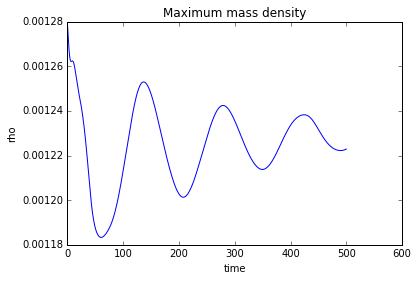

In [72]:
fig, ax = plt.subplots(1,1)
ax.plot(time, rhomax)
ax.set_title('Maximum mass density')
ax.set_xlabel('time')
ax.set_ylabel('rho')
plt.show()

Congratulations! You have setup Cactus, run your first simulation, and visualized some of the results! 